In [2]:
import numpy as np
import pandas as pd
from plot import log_plot as plot
from numba import njit
from time import time

In [3]:
@njit
def train_step(lr, n_iters, x_train, y_train):
    w, b = 0.0, 0.0
    m = x_train.size
    history = np.zeros(n_iters // 100_000 + 1)
    idx = 0
    for i in range(n_iters):
        y_pred = sigmoid(w, b, x_train)
        error = y_pred - y_train
        dw = np.dot(error, x_train)
        db = np.sum(error)

        w -= lr * dw / m
        b -= lr * db / m

        if i % 100_000 == 0 or i == n_iters - 1:
            cost = cost_function(x_train, y_train, w, b)
            history[idx] = cost
            idx += 1

    
    return w, b, history

In [4]:
def train(lr, n_iters, x_train, y_train):
    w, b, history = train_step(lr, n_iters, x_train, y_train)
    for i, cost in enumerate(history):
        step = i * 100_000
        if step > n_iters:
            step = n_iters
        print(f"Iteration: {step}, Cost: {cost}")
    
    return w, b

In [5]:
# Sigmoid Function
@njit
def sigmoid(w, b, X):
    z = w*X + b
    g_x = 1/(1 + np.exp(-z))
    return g_x

In [7]:
@njit
def cost_function(x, y, w, b):
    f_x = sigmoid(w, b, x)
    loss = -(y * np.log(f_x + 1e-15)) - (1 - y) * np.log(1 - f_x + 1e-15)
    return np.mean(loss)

@njit
def accuracy(w, b, x, y):
    preds = sigmoid(w, b, x) >= 0.5
    return np.mean(preds == y)

In [19]:
def predict(lr, n_iters, x_train, y_train, x_test, y_test):
    st = time()
    w, b = train(lr, n_iters, x_train, y_train)
    ed = time()
    print(f"w, b = ({w:.4f}, {b:.4f})")
    
    final_train_cost = cost_function(x_train, y_train, w, b)
    final_test_cost = cost_function(x_test, y_test, w, b)
    cost = max(final_test_cost, final_train_cost)
    print(f"Final Train Cost: {final_train_cost:.4f}")
    print(f"Final Test Cost: {final_test_cost:.4f}")

    accurate = accuracy(w, b, x_test, y_test)*100
    print(f"Accuracy: {accurate:.2f}%")
    print(f"time: {ed-st:.4f}")
    plot(w, b, x_test, y_test, cost, accurate)

Iteration: 0, Cost: 1.7826390706471382
Iteration: 100000, Cost: 1.424966232521874
Iteration: 200000, Cost: 1.1882014431516106
Iteration: 300000, Cost: 1.187818835077956
Iteration: 400000, Cost: 1.1878180378166021
Iteration: 500000, Cost: 1.1878180361722641
Iteration: 600000, Cost: 1.1878180361722641
Iteration: 700000, Cost: 1.1878180361722641
Iteration: 800000, Cost: 1.1878180361722641
Iteration: 900000, Cost: 1.1878180361722641
Iteration: 1000000, Cost: 1.0526751215869687
w, b = (0.7042, -59.8919)
Final Train Cost: 1.0527
Final Test Cost: 0.8250
Accuracy: 81.13%
time: 5.0020


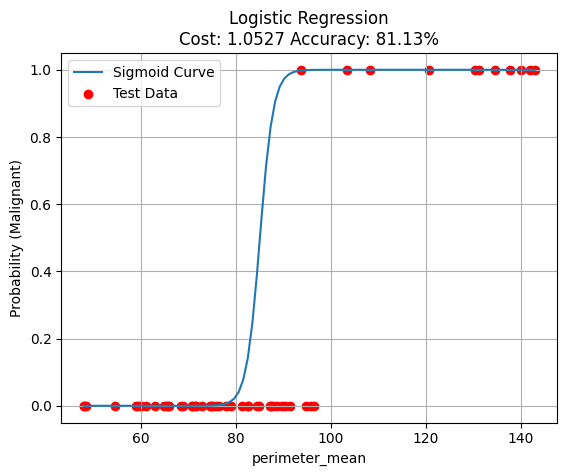

In [20]:
if __name__ == "__main__":
    data = pd.read_csv("cancer.csv")

    x_total = data["perimeter_mean"]
    y_total = data["diagnosis"]
    

    x_train = x_total.head(500).to_numpy()
    y_train = y_total.head(500).to_numpy()
    y_train = np.where(y_train == 'M', 1, 0)

    x_test = x_total.tail(53).to_numpy()
    y_test = y_total.tail(53).to_numpy()
    y_test = np.where(y_test == 'M', 1, 0)

    lr = 0.01
    n_iters = 1_000_000
    predict(lr, n_iters, x_train, y_train, x_test, y_test)